# Dicount Rate Decomposition and Historical Bond Pricing Model

Bond pricing is an application of discounted cash flow analysis.
Bond prices are a function of a bond’s features, including its cash flows and the interest rate(s) used to discount future cash flows.
A bond’s price changes inversely with changes in its YTM. A bond’s features determine price sensitivity to changes in YTM.
The higher the credit risk, the greater the offered/required yield and potential return demanded by investors.
The yield on a credit-risky bond comprises the yield on a default risk–free bond with a comparable maturity plus a yield premium, or “spread,” that comprises a credit spread and a liquidity premium. 
That spread is intended to compensate investors for credit risk—risk of default and loss severity in the event of default.

Problem Statement: Corporate bonds have two components of their discount rate (interest rate), the risk free (Goverment/TSY) rate and a credit premium (spread), the goal of this project is to explore the composition of the market discount rate on coperate bonds, i.e. risk free rate vs credit risk premium in order to construct historical bond price calculator using discounted cash flow analysis.

Ex. of discounted cash flow analysis:

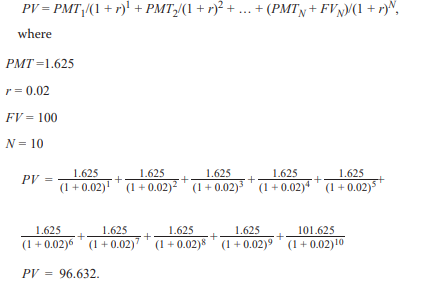

Source: https://www.cfainstitute.org/membership/professional-development/refresher-readings/Fixed-Income-Bond-Valuation-Prices-and-Yields

In [882]:
# Import needed librarys for data analysis, cleaning, visualization, bond price calcs etc...

import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
from datetime import datetime



First import Yield Curve data from Dept of Treaury...set source file as needed!

In [883]:
# Set tsy source file yield-curve-rates-1990-2023.csv
tsy_par_curve = r"C:\Users\carte\OneDrive\General Assembly\GA Homework\yield-curve-rates-1990-2023.csv"

# Read data to pandas df
try:
    tsy_df = pd.read_csv(tsy_par_curve)
    print("File loaded successfully...")
except FileNotFoundError:
    print("File not found...is file path correct?")
except Exception as e:
    print("Error occurred:", e)

File loaded successfully...


Let's explore our new tsy_df

In [884]:
# Find out what the tsy_df looks like
tsy_df.head(10)

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/29/2023,5.60,5.59,5.40,5.41,5.26,4.79,4.23,4.01,3.84,3.88,3.88,4.20,4.03
1,12/28/2023,5.57,5.55,5.45,5.42,5.28,4.82,4.26,4.02,3.83,3.84,3.84,4.14,3.98
2,12/27/2023,5.55,5.53,5.44,5.42,5.26,4.79,4.20,3.97,3.78,3.81,3.79,4.10,3.95
3,12/26/2023,5.53,5.52,5.45,5.44,5.28,4.83,4.26,4.05,3.89,3.91,3.89,4.20,4.04
4,12/22/2023,5.54,5.52,5.44,5.45,5.31,4.82,4.31,4.04,3.87,3.92,3.90,4.21,4.05
5,12/21/2023,5.54,5.53,5.42,5.45,5.31,4.84,4.33,4.06,3.87,3.91,3.89,4.19,4.03
6,12/20/2023,5.50,5.49,5.44,5.45,5.33,4.88,4.34,4.06,3.86,3.88,3.86,4.17,3.98
7,12/19/2023,5.51,5.51,5.43,5.45,5.35,4.93,4.41,4.15,3.94,3.96,3.93,4.23,4.03
8,12/18/2023,5.52,5.52,5.46,5.47,5.36,4.95,4.43,4.15,3.94,3.97,3.95,4.23,4.05
9,12/15/2023,5.54,5.54,5.44,5.47,5.33,4.95,4.44,4.13,3.91,3.94,3.91,4.19,4.00


What data type our data is currently in will inform what methods we can use for data cleaning lets find out what dtypes we have

In [885]:
# Get general info about df data types
tsy_df.dtypes

Date      object
1 Mo     float64
2 Mo     float64
3 Mo     float64
4 Mo     float64
6 Mo     float64
1 Yr     float64
2 Yr     float64
3 Yr     float64
5 Yr     float64
7 Yr     float64
10 Yr    float64
20 Yr    float64
30 Yr    float64
dtype: object

Now that we know we have dates as objects in the index column and floats in all other columns lets do some data cleaning...

Data has null values in some rows 1 Month, 2 Month, 3 Month, 4 Month, and 20 Year columns for example are newer tenors of tsy as such a historical record does not exist for the term of our data. Lets figure out where those null values are programatically and interpolate missing values in yield curve to populate a more complete data when we go to do bond valuation

In [886]:
# Check for null values in tsy_df rows and columns
print("Columns with null values:")
null_columns = tsy_df.columns[tsy_df.isnull().any()]
for column in null_columns:
    print(f"{column}")

print("\nRows with null values:")
null_rows = tsy_df[tsy_df.isnull().any(axis=1)].index
for index in null_rows:
    print(f"Index/Rows: {index}")


Columns with null values:
1 Mo
2 Mo
3 Mo
4 Mo
6 Mo
1 Yr
2 Yr
3 Yr
5 Yr
7 Yr
10 Yr
20 Yr
30 Yr

Rows with null values:
Index/Rows: 300
Index/Rows: 301
Index/Rows: 302
Index/Rows: 303
Index/Rows: 304
Index/Rows: 305
Index/Rows: 306
Index/Rows: 307
Index/Rows: 308
Index/Rows: 309
Index/Rows: 310
Index/Rows: 311
Index/Rows: 312
Index/Rows: 313
Index/Rows: 314
Index/Rows: 315
Index/Rows: 316
Index/Rows: 317
Index/Rows: 318
Index/Rows: 319
Index/Rows: 320
Index/Rows: 321
Index/Rows: 322
Index/Rows: 323
Index/Rows: 324
Index/Rows: 325
Index/Rows: 326
Index/Rows: 327
Index/Rows: 328
Index/Rows: 329
Index/Rows: 330
Index/Rows: 331
Index/Rows: 332
Index/Rows: 333
Index/Rows: 334
Index/Rows: 335
Index/Rows: 336
Index/Rows: 337
Index/Rows: 338
Index/Rows: 339
Index/Rows: 340
Index/Rows: 341
Index/Rows: 342
Index/Rows: 343
Index/Rows: 344
Index/Rows: 345
Index/Rows: 346
Index/Rows: 347
Index/Rows: 348
Index/Rows: 349
Index/Rows: 350
Index/Rows: 351
Index/Rows: 352
Index/Rows: 353
Index/Rows: 354
In

Data has null values in all all columns including the 1 Month, 2 Month, 3 Month, 4 Month, and 20 Year columns... these bond tenor have only recently started to be issued by tsy, as such a historical record does not exist fill in data in null values for more complete data set

In [887]:
# Perform linear interpretation based on cells to the left and right of blank and fill in interpolated yield curve value to df

# Specify the subset of attributes to interpolate...excluding index 0 as this has object dtype date column
attributes_to_interpolate = tsy_df.columns[1:]

# Perform linear interpolation based on closest tenor to fill in missing values
tsy_df[attributes_to_interpolate] = tsy_df[attributes_to_interpolate].interpolate(method='linear', axis=1)

# Test interpolation of 4 Month and 20 Year tsy
value = tsy_df.loc[7620]

value


Date     7/19/1993
1 Mo           NaN
2 Mo           NaN
3 Mo          3.12
4 Mo          3.18
6 Mo          3.24
1 Yr          3.42
2 Yr          3.99
3 Yr          4.35
5 Yr           5.0
7 Yr          5.37
10 Yr         5.71
20 Yr        6.125
30 Yr         6.54
Name: 7620, dtype: object

Summary Statistics of Treasury Yield Curve

Now that we know we have numerical data lets get some summary stats to gather a better feel for things like max tsy yield, min tsy yield, average per tennor across out time horizon

In [888]:
# Show summary stats of tsy_df data frame
tsy_curve_summary_stats = tsy_df.describe()
tsy_curve_summary_stats

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
count,5607.000000,5607.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000,8506.000000
mean,1.386841,1.425441,2.679516,2.746093,2.810676,2.927416,3.192941,3.387066,3.745660,4.032167,4.251213,4.721827,4.773272
std,1.642653,1.661171,2.294763,2.310040,2.325102,2.316671,2.323227,2.272247,2.167891,2.088132,1.995126,1.912246,1.830866
min,0.000000,0.000000,0.000000,0.015000,0.020000,0.040000,0.090000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.060000,0.080000,0.180000,0.245000,0.320000,0.490000,0.880000,1.270000,1.742500,2.170000,2.530000,2.940000,3.120000
50%,0.870000,0.905000,2.250000,2.337500,2.420000,2.540000,2.910000,3.180000,3.580000,3.850000,4.120000,4.730000,4.700000
75%,2.105000,2.160000,4.980000,5.030000,5.090000,5.060000,5.090000,5.230000,5.520000,5.720000,5.810000,6.200000,6.040000
max,6.020000,5.610000,8.260000,8.340000,8.490000,8.640000,9.050000,9.110000,9.100000,9.120000,9.090000,9.110000,9.180000


It is market convention to closely track the ['1 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr'] treasury yields. Lets visualize our data, graph par yield over time for various tenors of US Gov Debt. 


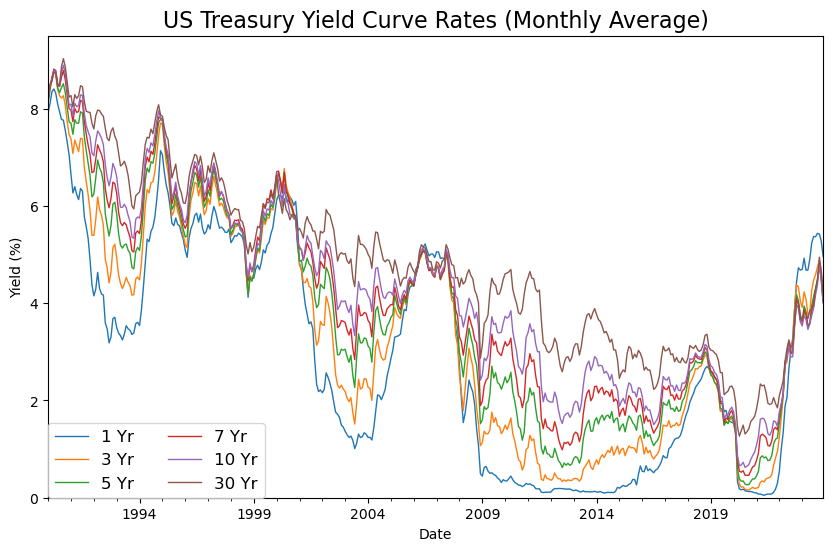

In [889]:
# Assuming 'Date' is the column name for the date/time index
tsy_df = tsy_df.set_index('Date')

# Sort DataFrame by date
tsy_df = tsy_df.sort_index()

# Select colums to plot
cols_to_plot = ['1 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr']
data_to_plot = tsy_df[cols_to_plot]

# Convert index to datetime format if necessary
tsy_df.index = pd.to_datetime(tsy_df.index)

# Resample the data to monthly frequency and take the mean
monthly_data = tsy_df[cols_to_plot].resample('M').mean()

# Create a line plot
fig, ax = plt.subplots(figsize=(10, 6))
monthly_data.plot(ax=ax, legend=True, linewidth=1)

# Set title and axis labels
ax.set_title('US Treasury Yield Curve Rates (Monthly Average)', fontsize=16)
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Yield (%)', fontsize=10)

# Add legend
legend = ax.legend(fontsize=12, loc='lower left', ncol=2, bbox_to_anchor=(0, 0), borderaxespad=0,)

# Adjust plot limits
ax.set_ylim(0, 9.5)

# Show the plot
plt.show()

Treasury yields can be broken down into (real interest rates + expected inflation rates). In this chart we can see that generally the longer the treasury bond the higher the yield, this makes sense as investors need to be compensated for bearing inflation uncertainty for longer periods of time. 

Additionally, its apparent that the 1yr note is the most volitile, this makes sense because short term yields are controlled by the Federal Funds rate, which is the interbank lending rates set by the Federal Reserve Open Market Commitee that sets cost of funding and baseline interest rates for the US economy.

During periods of economic crisis/high inflation front end rates move most dramatically. 1-yr bond yield fell during 2009 as Federal Reserve cut policy rate to stimulate economy. 1-yr bond yields rose during 2021 as Federal Reserve raises policy rate to combat high pandemic inflation

NY Federal Reserve: https://www.newyorkfed.org/markets/reference-rates/effr

While its important to track the ['1 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr'] term structure of interest rates, that chart is pretty messy, lets break each curve out in its own chart

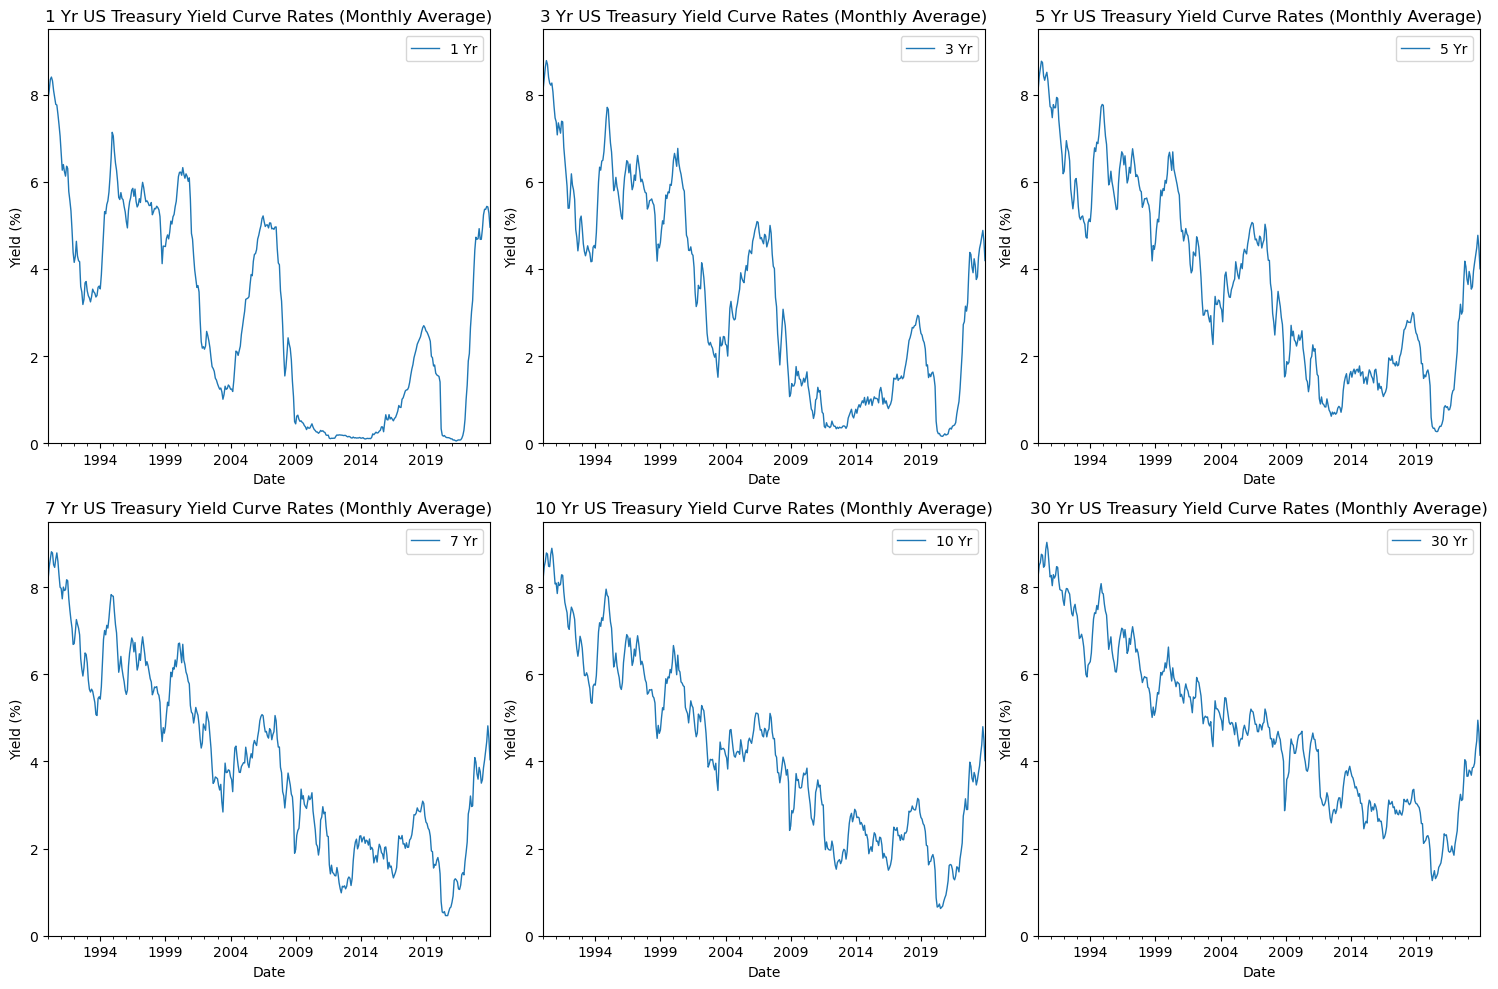

In [890]:
# Assuming 'Date' is the current index
tsy_df = tsy_df.reset_index()

# Assuming 'Date' is the column name for the date/time index
tsy_df = tsy_df.set_index('Date')

# Sort DataFrame by date
tsy_df = tsy_df.sort_index()

# Select columns to plot
cols_to_plot = ['1 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr']

# Convert index to datetime format if necessary
tsy_df.index = pd.to_datetime(tsy_df.index)

# Resample the data to monthly frequency and take the mean
monthly_data = tsy_df[cols_to_plot].resample('M').mean()

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Iterate over each column and create a line plot
for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    monthly_data[col].plot(ax=ax, linewidth=1)
    
    # Set title and axis labels
    ax.set_title(f'{col} US Treasury Yield Curve Rates (Monthly Average)', fontsize=12)
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Yield (%)', fontsize=10)
        
    # Add legend
    ax.legend(fontsize=10)
    
    # Adjust plot limits
    ax.set_ylim(0, 9.5)

# Adjust spacing between graphs
plt.tight_layout()

# Show the plot
plt.show()

# Option Adjusted Spread Analysis

Get Option Adjusted Spread information...set source file as needed!

In [891]:
# Set OAS source file ICE BofA 1-15+ Year US Corporate Index Option-Adjusted Spread.csv
option_adjusted_spreads = r"C:\Users\carte\OneDrive\General Assembly\GA Homework\ICE BofA 1-15+ Year US Corporate Index Option-Adjusted Spread.csv"

# Read data to pandas df, modify df columns names for readability, ie Option Adjusted Spread (OAS) 1-3, OAS 3-5, OAS 5-7... etc
try:
    spread_df = pd.read_csv(option_adjusted_spreads)
    new_column_names = ['Date','1-3 Yr', '3-5 Yr', '5-7 Yr', '7-10 Yr', '10-15 Yr', '15+ Yr']
    spread_df.columns = new_column_names
except FileNotFoundError:
    print("File not found...is file path correct?")
except Exception as e:
    print("An error occurred:", e)


spread_df

,Date,1-3 Yr,3-5 Yr,5-7 Yr,7-10 Yr,10-15 Yr,15+ Yr
0,12/31/1996,0.47,0.5,0.58,0.62,0.65,0.69
1,1/1/1997,.,.,.,.,.,.
2,1/2/1997,0.48,0.51,0.58,0.61,0.64,0.7
3,1/3/1997,0.48,0.51,0.58,0.62,0.63,0.7
4,1/6/1997,0.48,0.51,0.58,0.62,0.64,0.71
...,...,...,...,...,...,...,...
7226,5/6/2024,0.57,0.74,0.93,1.11,1.12,1.06
7227,5/7/2024,0.56,0.73,0.93,1.12,1.13,1.07
7228,5/8/2024,0.57,0.74,0.93,1.12,1.13,1.07
7229,5/9/2024,0.56,0.75,0.94,1.13,1.14,1.08


What types of data do I have?

In [892]:
# what types of data is in columns of spread_df
spread_df.dtypes

Date        object
1-3 Yr      object
3-5 Yr      object
5-7 Yr      object
7-10 Yr     object
10-15 Yr    object
15+ Yr      object
dtype: object

Looks like there are dates with null values, lets adress those by dropping them from our dataframe

In [893]:
# Replace '.' with NaN as float
spread_df = spread_df.replace('.', float('nan'))

# Drop all rows with any NaN values
spread_df = spread_df.dropna(how='any')

# Convert all columns starting from column 1 to dtype float64 to get more informative summary stats
for col in spread_df.columns[1:]:
    try:
        spread_df[col] = spread_df[col].astype('float64')
    except ValueError:
        print(f"Column '{col}' contains non numeric values.")

Summary Statistics for Option Adjusted Spread

In [894]:
# Take summary statistics of spread_df
spread_df.describe()


,1-3 Yr,3-5 Yr,5-7 Yr,7-10 Yr,10-15 Yr,15+ Yr
count,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000,7142.000000
mean,1.149031,1.325885,1.548072,1.625563,1.718216,1.777788
std,1.108795,0.904289,0.901737,0.798904,0.749488,0.636732
min,0.360000,0.430000,0.360000,0.540000,0.480000,0.630000
25%,0.600000,0.800000,1.020000,1.120000,1.170000,1.360000
50%,0.860000,1.070000,1.310000,1.510000,1.710000,1.710000
75%,1.210000,1.510000,1.770000,1.850000,1.970000,2.040000
max,8.140000,6.980000,6.800000,6.230000,5.840000,5.280000


Based on standard deviation and min/max vs mean, looks like there is some significant volatility in credit spreads, lets use box and wisker ploy to visualize spread vol across curve tenors

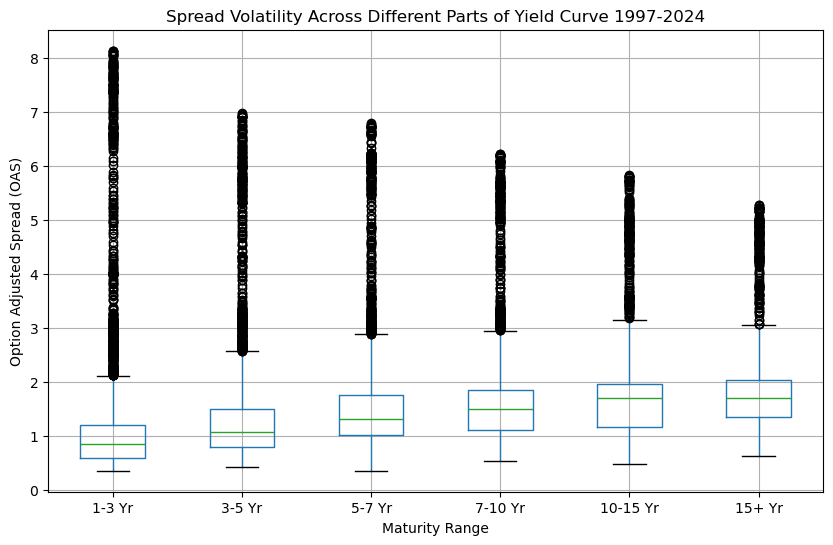

In [895]:
# Convert the 'Date' column to a datetime data type
spread_df['Date'] = pd.to_datetime(spread_df['Date'])

# Convert the index to a DatetimeIndex
spread_df.index = pd.to_datetime(spread_df.index)

# Calculate the yearly average for each maturity range
yearly_averages = spread_df.groupby(spread_df.index.year).mean()

# Create a box and whisker plot
fig, ax = plt.subplots(figsize=(10, 6))
spread_df.boxplot(column=['1-3 Yr', '3-5 Yr', '5-7 Yr', '7-10 Yr', '10-15 Yr', '15+ Yr'], ax=ax)

# Set plot title and labels
ax.set_title('Spread Volatility Across Different Parts of Yield Curve 1997-2024')
ax.set_xlabel('Maturity Range')
ax.set_ylabel('Option Adjusted Spread (OAS)')

# Show box and wisker
plt.show()

Graph OAS change over time to visualize volatility. 

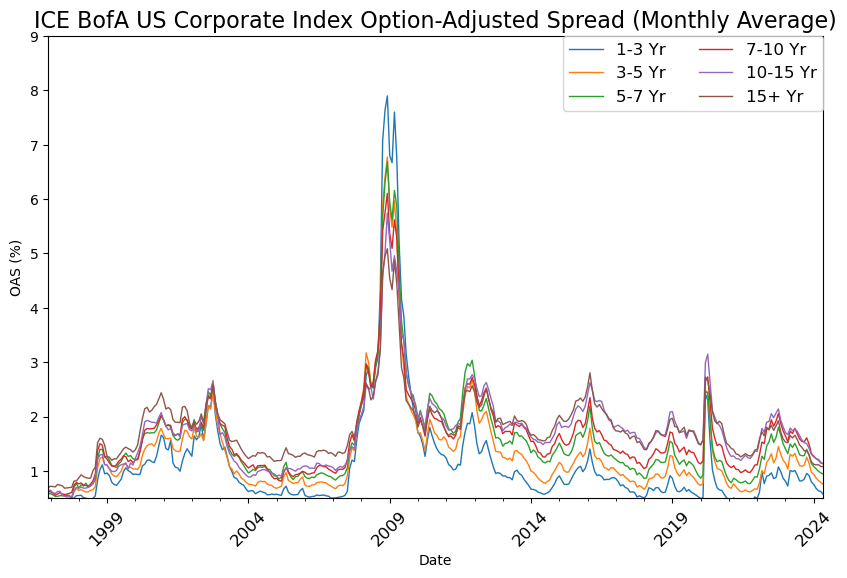

In [896]:
# restate new column names
new_column_names = ['1-3 Yr', '3-5 Yr', '5-7 Yr', '7-10 Yr', '10-15 Yr', '15+ Yr']

# Convert the date column to datetime
#spread_df['Date'] = pd.to_datetime(spread_df['Date'])

# Set the index to date column
spread_df = spread_df.set_index('Date')

# Resample the data to monthly frequency and take the mean
monthly_data = spread_df[new_column_names].resample('M').mean()

# Create a line plot
fig, ax = plt.subplots(figsize=(10, 6))
monthly_data.plot(ax=ax, legend=True, linewidth=1)

# Set title and axis labels
ax.set_title('ICE BofA US Corporate Index Option-Adjusted Spread (Monthly Average)', fontsize=16)
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('OAS (%)', fontsize=10)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=12)

# Add legend
legend = ax.legend(fontsize=12, loc='upper right', ncol=2, bbox_to_anchor=(1, 1), borderaxespad=0)

# Adjust plot limits
ax.set_ylim(.5, 9)  # Adjust the y-axis limits as needed

# Show the plot
plt.show()

Credit spread can be broken down into (liquidity risk + credit risk).
Credit spreads increase during periods of economic uncertainty as probability of default increases and market liquidity decreases.
Spreads widened +700-800bps during 2008 financial crisis.
Spreads decrease when default risk falls and market liquidity is high.
Spreads tightened >100bps from 2020 to 2022 as pandemic stimulus strengthened corporate earnings and increased market liquidity.
Credit spreads are measured in basis points, 1/100th of 1%.



Create a dictionary for Yield Cuve Tenors and Spread Curve Segments


In [897]:
# Create a dictionary for yield data
yield_dict = {}
# Populate dict values, iterate through rows using dates as keys and yield data for various parts of yield curve as values
for date, row in tsy_df.iterrows():
    date_str = str(date)
    yield_dict[date_str] = row.to_dict()
print(f"Yield curve history dictionary: {list(yield_dict.items())[:10]}")

#Create a dictionary for spread data
spread_dict = {}
# Populate dict values, iterate through rows using dates as keys and spread data for various parts of yield curve as values
for date, row in spread_df.iterrows():
    date_str = str(date)
    spread_dict[date_str] = row.to_dict()
print(f"Spread curve history dictionary: {list(spread_dict.items())[:10]}")



Yield curve history dictionary: [('1990-01-02 00:00:00', {'1 Mo': nan, '2 Mo': nan, '3 Mo': 7.83, '4 Mo': 7.859999999999999, '6 Mo': 7.89, '1 Yr': 7.81, '2 Yr': 7.87, '3 Yr': 7.9, '5 Yr': 7.87, '7 Yr': 7.98, '10 Yr': 7.94, '20 Yr': 7.970000000000001, '30 Yr': 8.0}), ('1990-01-03 00:00:00', {'1 Mo': nan, '2 Mo': nan, '3 Mo': 7.89, '4 Mo': 7.915, '6 Mo': 7.94, '1 Yr': 7.85, '2 Yr': 7.94, '3 Yr': 7.96, '5 Yr': 7.92, '7 Yr': 8.04, '10 Yr': 7.99, '20 Yr': 8.015, '30 Yr': 8.04}), ('1990-01-04 00:00:00', {'1 Mo': nan, '2 Mo': nan, '3 Mo': 7.84, '4 Mo': 7.87, '6 Mo': 7.9, '1 Yr': 7.82, '2 Yr': 7.92, '3 Yr': 7.93, '5 Yr': 7.91, '7 Yr': 8.02, '10 Yr': 7.98, '20 Yr': 8.01, '30 Yr': 8.04}), ('1990-01-05 00:00:00', {'1 Mo': nan, '2 Mo': nan, '3 Mo': 7.79, '4 Mo': 7.82, '6 Mo': 7.85, '1 Yr': 7.79, '2 Yr': 7.9, '3 Yr': 7.94, '5 Yr': 7.92, '7 Yr': 8.03, '10 Yr': 7.99, '20 Yr': 8.025, '30 Yr': 8.06}), ('1990-01-08 00:00:00', {'1 Mo': nan, '2 Mo': nan, '3 Mo': 7.79, '4 Mo': 7.835, '6 Mo': 7.88, '1 Yr': 

# Historical Bond Pricing Model

Lets use numpy_financial and our data sets to calculate determine the price of a coperate bond been on a given date...run the sript and enter a int for coupon, a date, and years to maturity, output is bond price estimate

Ex. Coupon: 5, Valuation Date: 01/01/2000, Years to Maturity: 5

Bond price: $89.62

In [898]:
def nearest_business_day(date):
    date = pd.to_datetime(date.date())
    return pd.to_datetime(pd.tseries.offsets.BDay(1).rollforward(date))

def bond_price(coupon, valuation_date, years_to_maturity, tsy_df, spread_df):
    # Reset df to get date index values
    tsy_df = tsy_df.reset_index()
    spread_df = spread_df.reset_index()

    # Convert the date index values to datetime
    tsy_df['Date'] = pd.to_datetime(tsy_df['Date'], format='%d/%m/%Y')
    spread_df['Date'] = pd.to_datetime(spread_df['Date'], format='%d/%m/%Y')

    # Convert years_to_maturity to the nearest integer to handle floats ex. 5.5 yrs to mat
    rounded_maturity = round(years_to_maturity)
    print(f"Rounded maturity: {rounded_maturity}")

    # Map the rounded maturity to the appropriate treasury yield column
    tsy_col_map = {1: '1 Yr', 2: '2 Yr', 3: '3 Yr', 5: '5 Yr', 7: '7 Yr', 10: '10 Yr', 20: '20 Yr', 30: '30 Yr'}
    tsy_col = tsy_col_map.get(rounded_maturity, '30 Yr')

    # Map the rounded maturity to the appropriate spread column
    spread_col_map = {1: '1-3 Yr', 2: '1-3 Yr', 3: '1-3 Yr', 4: '3-5 Yr', 5: '3-5 Yr', 6: '5-7 Yr', 7: '5-7 Yr',
                      8: '7-10 Yr', 9: '7-10 Yr', 10: '7-10 Yr', 11: '10-15 Yr', 12: '10-15 Yr', 13: '10-15 Yr',
                      14: '10-15 Yr', 15: '10-15 Yr', 16: '15+ Yr', 17: '15+ Yr', 18: '15+ Yr', 19: '15+ Yr',
                      20: '15+ Yr', 21: '15+ Yr', 22: '15+ Yr', 23: '15+ Yr', 24: '15+ Yr', 25: '15+ Yr', 26: '15+ Yr',
                      27: '15+ Yr', 28: '15+ Yr', 29: '15+ Yr', 30: '15+ Yr'}
    spread_col = spread_col_map.get(rounded_maturity, '15+ Yr')
    
    try:
        # Get the treasury yield and spread for the valuation date
        tsy_yield = tsy_df.loc[tsy_df['Date'] == valuation_date, tsy_col].values[0]
        print(f"Treasury yield column: {tsy_col}")
        print(f"Treasury yield: {tsy_yield}")
        spread = spread_df.loc[spread_df['Date'] == valuation_date, spread_col].values[0]
        print(f"Spread column: {spread_col}")
        print(f"Spread: {spread}")
    except IndexError:
        print(f"Error: Valuation date {valuation_date.date()} not found in the data.")
        return None
    except KeyError as e:
        print(f"Error: {e}")
        return None

    # Calculate the discount rate as the sum of treasury yield and spread
    discount_rate = tsy_yield + spread
    print(f"Discount rate: {discount_rate}")

    # Calculate the bond price
    freq = 2  # Semi-annual coupon payments
    periods = years_to_maturity * freq
    bond_value = npf.pv(discount_rate / 100 / freq, periods, -coupon / 100 / freq, -1) * 100
    return bond_value

# Get user inputs
coupon = float(input("Enter the coupon rate %: "))

while True:
    valuation_date_str = input("Enter the valuation date (mm/dd/yyyy): ")
    try:
        valuation_date = pd.to_datetime(valuation_date_str, format='%m/%d/%Y', errors='raise')
        valuation_date = nearest_business_day(valuation_date)
        break
    except ValueError:
        print("Invalid date format. Enter the date in the format 'mm/dd/yyyy'.")

years_to_maturity = float(input("Enter the years to maturity: "))

# Call the bond_price function with user inputs
bond_value = bond_price(coupon, valuation_date, years_to_maturity, tsy_df, spread_df)

if bond_value is not None:
    print(f"The price of the {coupon}% coupon bond on {valuation_date.date()} with {years_to_maturity} years to maturity is approx ${bond_value:.2f}")

Rounded maturity: 5
Treasury yield column: 5 Yr
Treasury yield: 6.5
Spread column: 3-5 Yr
Spread: 1.03
Discount rate: 7.53
The price of the 5.0% coupon bond on 2000-01-03 with 5.0 years to maturity is approx $89.62
